In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

# Pre-registered r-squareds

In [2]:
embedding_results_folder = 'results/preregistered_models_diff_embeddings/rsquared/'
results_files = os.listdir(embedding_results_folder)
results_files

['elmo_context_all_judgments.csv',
 'glove_postspec_all_judgments.csv',
 'paragram_all_judgments.csv',
 'elmo_decontext_all_judgments.csv',
 'word2vec_all_judgments.csv',
 'bert_context_all_judgments.csv',
 'swow_rw_all_judgments.csv',
 'bert_decontext_all_judgments.csv',
 'glove_all_judgments.csv',
 'fasttext_all_judgments.csv']

In [3]:
all_models_best_results = []
for file_path in results_files:
    results = pd.read_csv(embedding_results_folder+file_path, index_col=0)
    averages = results.mean(axis=1)
    best_parameter = averages.argmax()
    best_results = results.loc[best_parameter]
    
    embedding_type = '_'.join(file_path.split('_')[:-2])
    best_results['embedding_type'] = embedding_type
    all_models_best_results.append(best_results)

/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """
/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:1015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

In [4]:
all_models_best_results = pd.DataFrame(all_models_best_results).reset_index().set_index('embedding_type')
all_models_best_results.rename({'index':'hyperparameters'}, axis='columns', inplace=True)
all_models_best_results

,hyperparameters,masculine,feminine,dread-inducing,unknowable,warm,competent,tasty,nutritious,significance,autonomy,sincere,exciting,hedonic,utilitarian
embedding_type,,,,,,,,,,,,,,,
elmo_context,{'alpha': 0.1},0.38,0.52,0.73,0.67,-0.29,-0.38,0.03,0.40,0.56,0.51,-0.19,0.41,0.49,0.39
glove_postspec,{'alpha': 1},0.62,0.76,0.50,0.47,not_enough_vectors,not_enough_vectors,0.15,0.45,0.39,0.29,0.11,0.26,0.30,0.27
paragram,{'alpha': 1},0.56,0.67,0.60,0.57,not_enough_vectors,not_enough_vectors,0.30,0.59,0.43,0.21,0.08,0.37,0.52,0.48
elmo_decontext,{'alpha': 0.1},0.44,0.49,0.80,0.66,-0.22,-0.28,0.36,0.60,0.55,0.41,0.04,0.11,0.55,0.49
word2vec,{'alpha': 1},0.46,0.62,0.72,0.68,0.52,0.51,0.38,0.56,0.47,0.53,0.2,0.23,0.64,0.51
bert_context,{'alpha': 0.1},0.37,0.41,0.67,0.58,-0.16,-0.29,0.21,0.25,0.21,0.20,-0.17,-0.38,0.38,0.25
swow_rw,{'alpha': 0.1},0.82,0.79,0.80,0.77,not_enough_vectors,not_enough_vectors,0.30,0.62,0.58,0.58,not_enough_vectors,not_enough_vectors,0.67,0.64
bert_decontext,{'alpha': 0.1},0.40,0.54,0.66,0.57,-0.17,-0.16,0.11,0.26,0.23,0.34,-0.31,-0.36,0.43,0.35
glove,{'alpha': 1},0.57,0.68,0.72,0.67,not_enough_vectors,not_enough_vectors,0.36,0.66,0.50,0.55,0.24,0.33,0.61,0.54


In [5]:
all_models_best_results['average'] = all_models_best_results.mean(axis=1).values

In [6]:
all_models_best_results

,hyperparameters,masculine,feminine,dread-inducing,unknowable,warm,competent,tasty,nutritious,significance,autonomy,sincere,exciting,hedonic,utilitarian,average
embedding_type,,,,,,,,,,,,,,,,
elmo_context,{'alpha': 0.1},0.38,0.52,0.73,0.67,-0.29,-0.38,0.03,0.40,0.56,0.51,-0.19,0.41,0.49,0.39,0.468
glove_postspec,{'alpha': 1},0.62,0.76,0.50,0.47,not_enough_vectors,not_enough_vectors,0.15,0.45,0.39,0.29,0.11,0.26,0.30,0.27,0.420
paragram,{'alpha': 1},0.56,0.67,0.60,0.57,not_enough_vectors,not_enough_vectors,0.30,0.59,0.43,0.21,0.08,0.37,0.52,0.48,0.493
elmo_decontext,{'alpha': 0.1},0.44,0.49,0.80,0.66,-0.22,-0.28,0.36,0.60,0.55,0.41,0.04,0.11,0.55,0.49,0.535
word2vec,{'alpha': 1},0.46,0.62,0.72,0.68,0.52,0.51,0.38,0.56,0.47,0.53,0.2,0.23,0.64,0.51,0.557
bert_context,{'alpha': 0.1},0.37,0.41,0.67,0.58,-0.16,-0.29,0.21,0.25,0.21,0.20,-0.17,-0.38,0.38,0.25,0.353
swow_rw,{'alpha': 0.1},0.82,0.79,0.80,0.77,not_enough_vectors,not_enough_vectors,0.30,0.62,0.58,0.58,not_enough_vectors,not_enough_vectors,0.67,0.64,0.657
bert_decontext,{'alpha': 0.1},0.40,0.54,0.66,0.57,-0.17,-0.16,0.11,0.26,0.23,0.34,-0.31,-0.36,0.43,0.35,0.389
glove,{'alpha': 1},0.57,0.68,0.72,0.67,not_enough_vectors,not_enough_vectors,0.36,0.66,0.50,0.55,0.24,0.33,0.61,0.54,0.586


In [7]:
all_models_best_results_no_brands_people = all_models_best_results.drop(['warm','competent','sincere','exciting'], axis='columns')
all_models_best_results_no_brands_people['average'] = all_models_best_results_no_brands_people.mean(axis=1).values
all_models_best_results_no_brands_people

,hyperparameters,masculine,feminine,dread-inducing,unknowable,tasty,nutritious,significance,autonomy,hedonic,utilitarian,average
embedding_type,,,,,,,,,,,,
elmo_context,{'alpha': 0.1},0.38,0.52,0.73,0.67,0.03,0.40,0.56,0.51,0.49,0.39,0.468
glove_postspec,{'alpha': 1},0.62,0.76,0.50,0.47,0.15,0.45,0.39,0.29,0.30,0.27,0.420
paragram,{'alpha': 1},0.56,0.67,0.60,0.57,0.30,0.59,0.43,0.21,0.52,0.48,0.493
elmo_decontext,{'alpha': 0.1},0.44,0.49,0.80,0.66,0.36,0.60,0.55,0.41,0.55,0.49,0.535
word2vec,{'alpha': 1},0.46,0.62,0.72,0.68,0.38,0.56,0.47,0.53,0.64,0.51,0.557
bert_context,{'alpha': 0.1},0.37,0.41,0.67,0.58,0.21,0.25,0.21,0.20,0.38,0.25,0.353
swow_rw,{'alpha': 0.1},0.82,0.79,0.80,0.77,0.30,0.62,0.58,0.58,0.67,0.64,0.657
bert_decontext,{'alpha': 0.1},0.40,0.54,0.66,0.57,0.11,0.26,0.23,0.34,0.43,0.35,0.389
glove,{'alpha': 1},0.57,0.68,0.72,0.67,0.36,0.66,0.50,0.55,0.61,0.54,0.586


In [8]:
all_models_best_results_no_brands_people = all_models_best_results_no_brands_people.sort_values('average')

In [9]:
all_models_best_results_no_brands_people['hyperparameters'].apply(lambda x: literal_eval(x)['alpha'])

embedding_type
bert_context      0.1
bert_decontext    0.1
glove_postspec    1.0
elmo_context      0.1
paragram          1.0
elmo_decontext    0.1
word2vec          1.0
glove             1.0
fasttext          0.1
swow_rw           0.1
Name: hyperparameters, dtype: float64

In [10]:
hyperparams = all_models_best_results_no_brands_people['hyperparameters'].apply(lambda x: literal_eval(x)['alpha'])

In [11]:
heatmap_ylabels = list(hyperparams.index + ', alpha: ' + hyperparams.map(str))
heatmap_ylabels

['bert_context, alpha: 0.1',
 'bert_decontext, alpha: 0.1',
 'glove_postspec, alpha: 1.0',
 'elmo_context, alpha: 0.1',
 'paragram, alpha: 1.0',
 'elmo_decontext, alpha: 0.1',
 'word2vec, alpha: 1.0',
 'glove, alpha: 1.0',
 'fasttext, alpha: 0.1',
 'swow_rw, alpha: 0.1']

In [12]:
all_models_best_results_no_brands_people.index = heatmap_ylabels

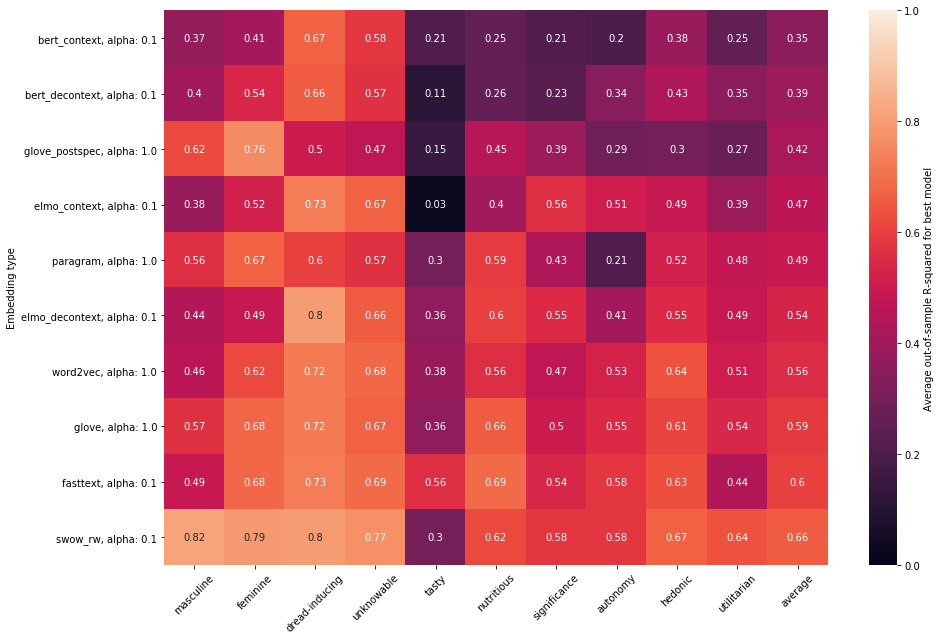

In [13]:
plt.subplots(figsize=(14,9));

sns.heatmap(data=all_models_best_results_no_brands_people.drop('hyperparameters', axis='columns'), 
            annot=True, vmin=0, vmax=1,
            cbar_kws={'label': "Average out-of-sample R-squared for best model"});

plt.xticks(rotation=45);
plt.ylabel("Embedding type")
# plt.savefig('figures/different_embedding_results.png')
plt.tight_layout()
plt.savefig('figures/different_embedding_results.eps', format='eps', pad_inches=10)
plt.show()

# Out of sample predicted vs actual correlations

In [14]:
# all_vec_type_results = pd.read_csv('results/preregistered_models_diff_embeddings/out-of-sample_pred-v-actual_corrs.csv', index_col=0)
all_vec_type_results = pd.read_csv('results/preregistered_models_diff_embeddings/out-of-sample_pred-v-actual_corrs_no_swow_rw.csv', index_col=0)

In [15]:
all_vec_type_results['average'] = all_vec_type_results.mean(axis=1).values

In [16]:
all_vec_type_results.columns = [x.capitalize() for x in all_vec_type_results.columns]

In [17]:
all_vec_type_results

,Masculine,Feminine,Dread-inducing,Unknowable,Tasty,Nutritious,Significance,Autonomy,Hedonic,Utilitarian,Average
word2vec,0.744364,0.803668,0.886180,0.869653,0.670392,0.843523,0.830329,0.816120,0.836901,0.777157,0.807829
fasttext,0.761170,0.815241,0.875286,0.835785,0.716770,0.865361,0.793513,0.837047,0.809798,0.755734,0.806570
glove,0.803073,0.851510,0.882312,0.853384,0.706478,0.878480,0.832890,0.805618,0.832507,0.784699,0.823095
elmo_decontext,0.724660,0.756377,0.900160,0.863206,0.612310,0.741526,0.825330,0.787053,0.788508,0.761295,0.776042
elmo_context,0.688046,0.750063,0.878969,0.851258,0.455575,0.665412,0.831495,0.779633,0.738257,0.658475,0.729718
paragram,0.789499,0.838304,0.830493,0.809434,0.663651,0.855733,0.751094,0.668672,0.763002,0.746232,0.771611
glove_postspec,0.836223,0.882729,0.765378,0.757595,0.499151,0.824946,0.759834,0.712590,0.650815,0.650016,0.733928
bert_decontext,0.706098,0.719789,0.816435,0.754342,0.464481,0.525528,0.708295,0.717110,0.674476,0.663566,0.675012
bert_context,0.723288,0.719834,0.799203,0.720404,0.446455,0.508184,0.648374,0.730803,0.633624,0.618687,0.654885


In [18]:
all_vec_type_results.index = ['word2vec',
                              'fastText',
                              'GloVe',
                              'ELMO, no context',
                              'ELMO, in context',
#                               'SWOW, random walk',
                              'Paragram-SL999',
                              'GloVe, postspecialised',
                              'BERT, no context',
                              'BERT, in context']

In [19]:
all_vec_type_results.sort_values('Average', inplace=True)

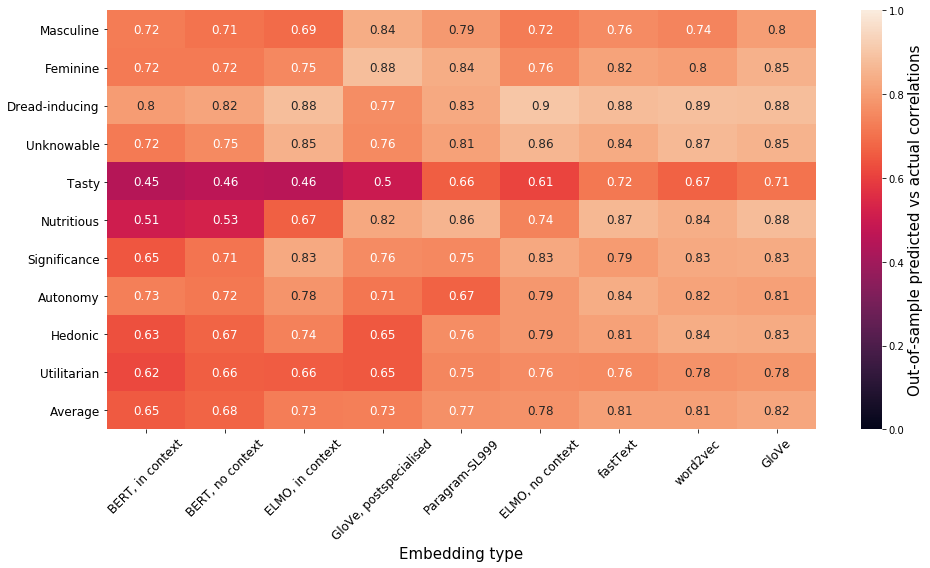

In [20]:
plt.subplots(figsize=(14,8));

ax= sns.heatmap(data=all_vec_type_results.T, 
                annot=True, vmin=0, vmax=1, annot_kws={"size": 12},
                cbar_kws={'label': "Out-of-sample predicted vs actual correlations"});

plt.xticks(rotation=45);
ax.tick_params(labelsize=12)
ax.set_xlabel("Embedding type", fontsize=15)


cbar_axes = ax.figure.axes[-1]
cbar_axes.yaxis.label.set_size(15)

# ax.set_ylabel('Judgment Dimension', fontsize=15)
plt.tight_layout()
# plt.savefig('figures/different_embedding_loocv_results.eps', format='eps', pad_inches=10)
# plt.savefig('figures/different_embedding_loocv_results.png', pad_inches=10)
plt.savefig('figures/different_embedding_loocv_results_no_swow_rw.png', pad_inches=10)
plt.savefig('figures/different_embedding_loocv_results_no_swow_rw_high_res.png', pad_inches=10, dpi=500)
plt.show()